# Paris Housing Classification


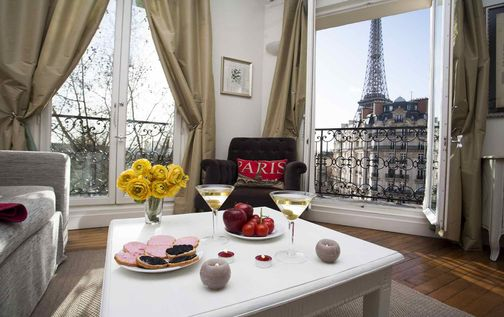

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
data=pd.read_csv("ParisHousingClass.csv")
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [3]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

# EDA

In [4]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Text(0, 0.5, '')

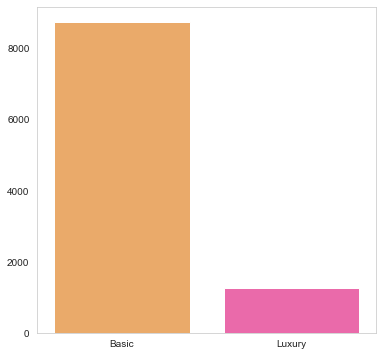

In [5]:
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3)
ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(x='category', data=data, ax=ax1, palette='spring_r')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

In [6]:
data['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

the number of Basic houses more than the luxury 

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,1,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,1,1,19,34457,6,8,2021,1,1,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,1,1,6,27939,10,4,2012,1,1,659,7141,359,1,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,1,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,1,1,5,73133,7,6,2009,1,1,9311,1698,218,1,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,1,1,9061,1742,230,1,4,4448474.0,Basic
9997,83841,3,1,1,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,1,1,96,55856,1,3,2010,1,1,2590,6174,339,1,4,5905107.0,Basic


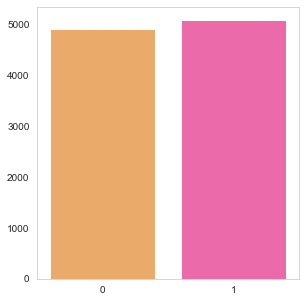

In [7]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(x='hasYard', data=data, ax=ax1, palette='spring_r')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')
data.replace((0))

houses have yard is more than the houses have not 

In [8]:
pd.crosstab(data['category'], data['hasYard'], margins=True).style.background_gradient(cmap="YlGnBu")

hasYard,0,1,All
category,,,
Basic,4913,3822,8735
Luxury,0,1265,1265
All,4913,5087,10000


<AxesSubplot:xlabel='hasYard', ylabel='count'>

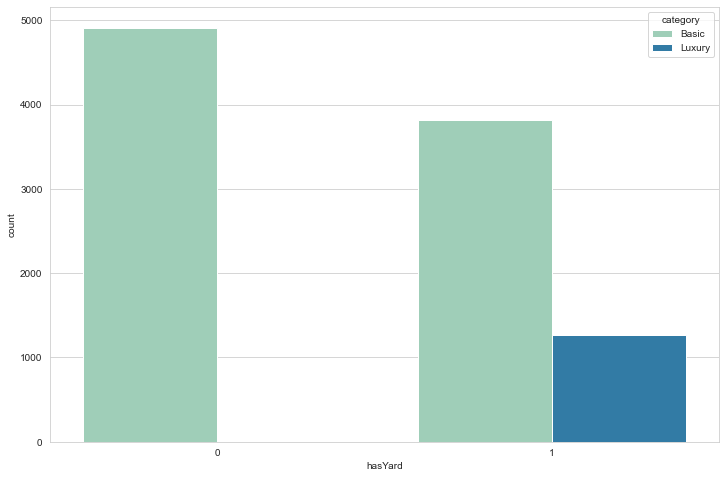

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasYard', data=data, hue='category',  palette='YlGnBu')

the table show the number of basic and luxury that have yard 
& all the luxury houses have yard

<AxesSubplot:ylabel='hasPool'>

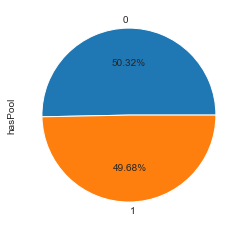

In [10]:
data['hasPool'].value_counts(normalize = True).plot.pie(autopct = '%.2f%%')

In [11]:
pd.crosstab(data['category'], data['hasPool'], margins=True).style.background_gradient(cmap="YlGnBu")

hasPool,0,1,All
category,,,
Basic,5032,3703,8735
Luxury,0,1265,1265
All,5032,4968,10000


<AxesSubplot:xlabel='hasPool', ylabel='count'>

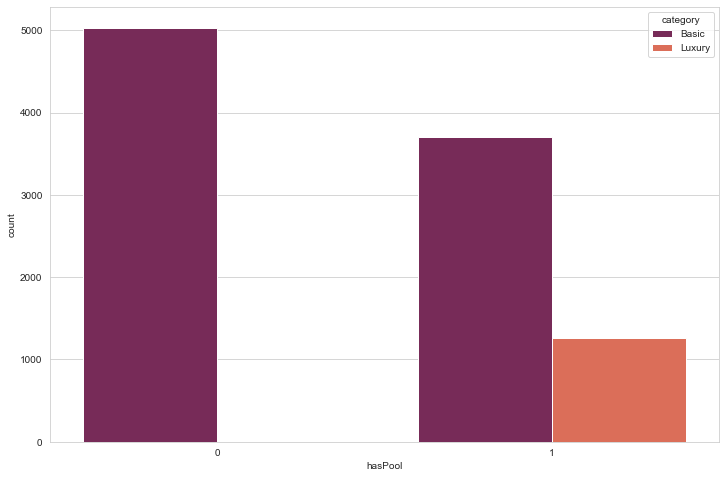

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasPool', data=data, hue='category',  palette='rocket')

houses have Pool is more than the houses have not 

the table show the number of basic and luxury that have Pool

<AxesSubplot:xlabel='cityPartRange', ylabel='count'>

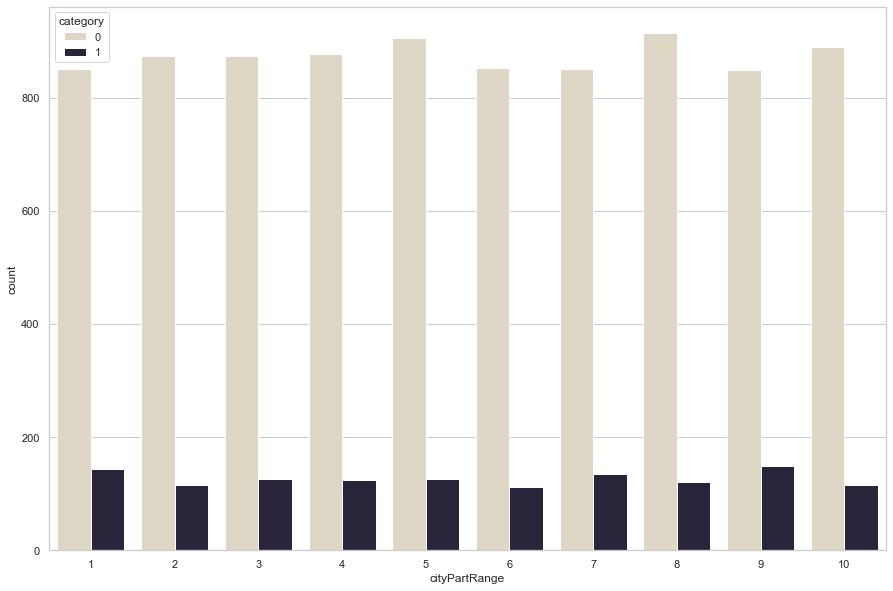

In [138]:
plt.figure(figsize=(15,10))
sns.countplot(x='cityPartRange', data=data, hue='category',  palette='ch:s=-.2,r=.6')

In [144]:
pd.crosstab(data['category'], data['cityPartRange'], margins=True).style.background_gradient(cmap="YlGnBu")

cityPartRange,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
0,851,874,873,877,905,853,850,915,848,889,8735
1,143,116,126,124,126,112,134,120,149,115,1265
All,994,990,999,1001,1031,965,984,1035,997,1004,10000


the the table show the number of houses in each part of city

<AxesSubplot:xlabel='numPrevOwners', ylabel='count'>

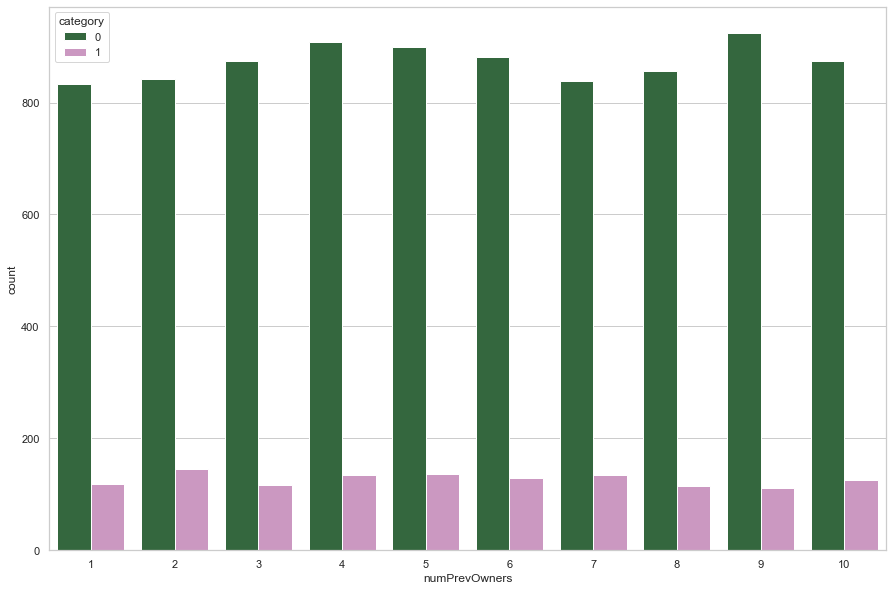

In [136]:
plt.figure(figsize=(15,10))
sns.countplot(x='numPrevOwners', data=data, hue='category',  palette='cubehelix')

In [14]:
pd.crosstab(data['category'], data['numPrevOwners'], margins=True).style.background_gradient(cmap="YlGnBu")

numPrevOwners,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,834,842,874,909,900,882,839,856,925,874,8735
Luxury,118,145,117,134,136,129,135,115,111,125,1265
All,952,987,991,1043,1036,1011,974,971,1036,999,10000


In [15]:
pd.crosstab(data['category'], data['isNewBuilt'], margins=True).style.background_gradient(cmap="YlGnBu")

isNewBuilt,0,1,All
category,,,
Basic,5009,3726,8735
Luxury,0,1265,1265
All,5009,4991,10000


In [16]:
pd.crosstab(data['category'], data['isNewBuilt'], margins=True).style.background_gradient(cmap="YlGnBu")

isNewBuilt,0,1,All
category,,,
Basic,5009,3726,8735
Luxury,0,1265,1265
All,5009,4991,10000


<AxesSubplot:xlabel='isNewBuilt', ylabel='count'>

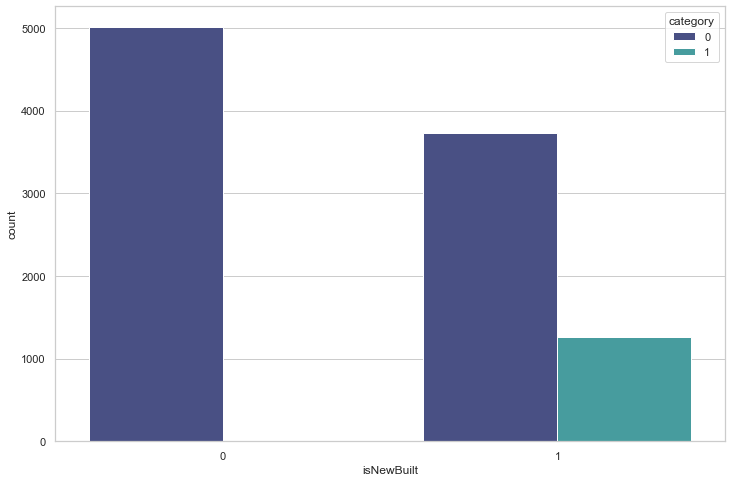

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='isNewBuilt', data=data, hue='category',  palette='mako')

In [18]:
pd.crosstab(data['category'], data['hasStormProtector'], margins=True).style.background_gradient(cmap="YlGnBu")

hasStormProtector,0,1,All
category,,,
Basic,4372,4363,8735
Luxury,629,636,1265
All,5001,4999,10000


<AxesSubplot:xlabel='hasStormProtector', ylabel='count'>

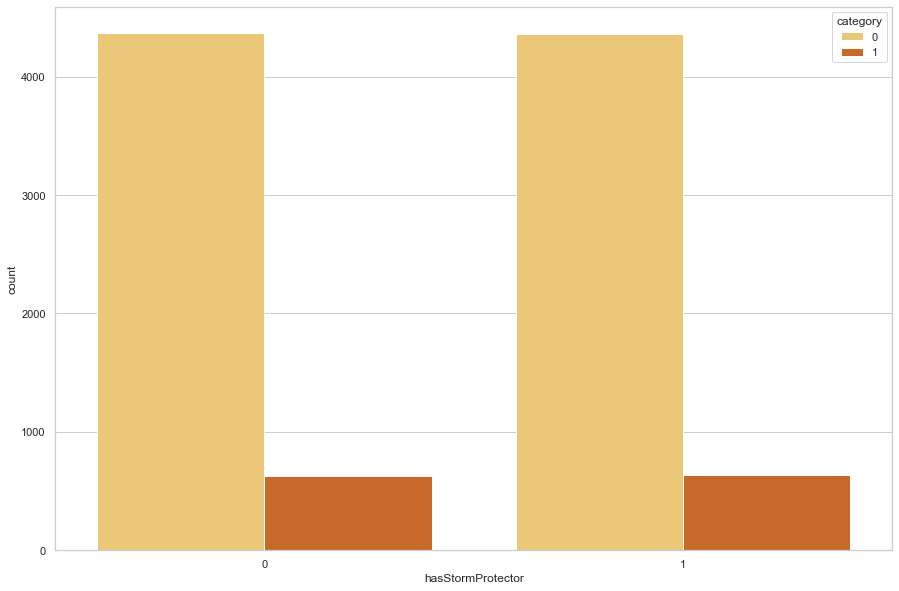

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasStormProtector', data=data, hue='category',  palette='YlOrBr')

In [20]:
pd.crosstab(data['category'], data['hasStorageRoom'], margins=True).style.background_gradient(cmap="YlGnBu")

hasStorageRoom,0,1,All
category,,,
Basic,4345,4390,8735
Luxury,625,640,1265
All,4970,5030,10000


<AxesSubplot:xlabel='hasStorageRoom', ylabel='count'>

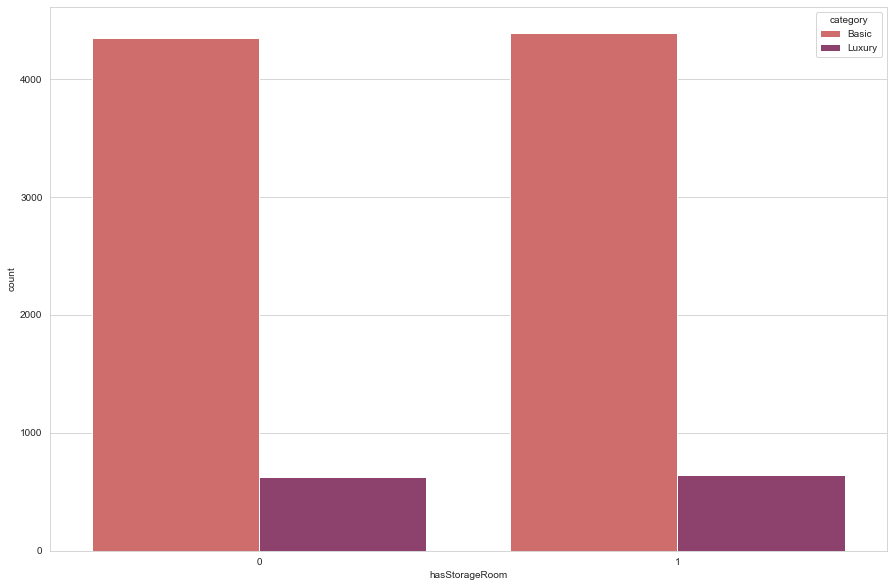

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasStorageRoom', data=data, hue='category',  palette='flare')

In [22]:
pd.crosstab(data['category'], data['hasGuestRoom'],margins=True).style.background_gradient(cmap="YlGnBu")

hasGuestRoom,0,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,,
Basic,809,795,809,782,806,764,803,769,791,807,800,8735
Luxury,105,115,133,124,105,110,101,115,122,109,126,1265
All,914,910,942,906,911,874,904,884,913,916,926,10000


<AxesSubplot:xlabel='hasGuestRoom', ylabel='count'>

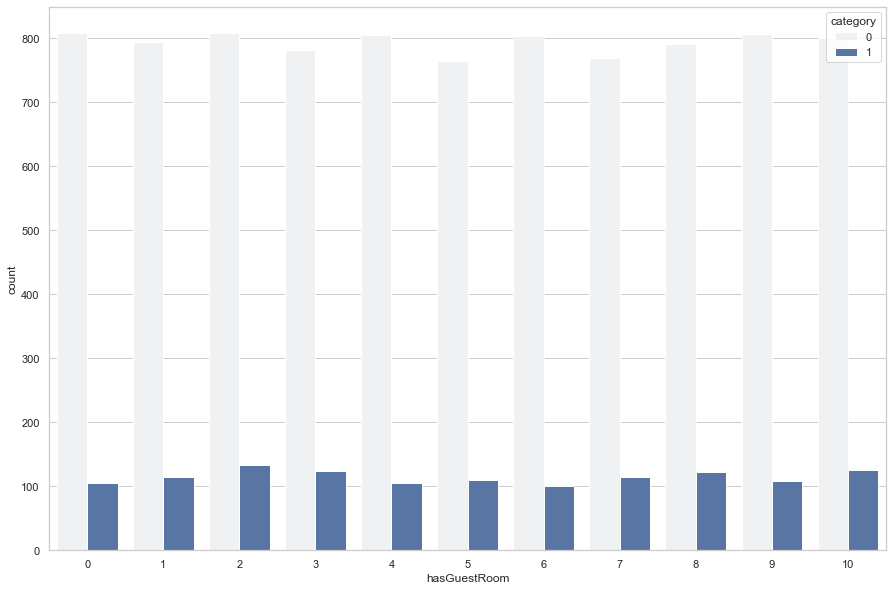

In [65]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasGuestRoom', data=data, hue='category',  palette='light:b')

<AxesSubplot:>

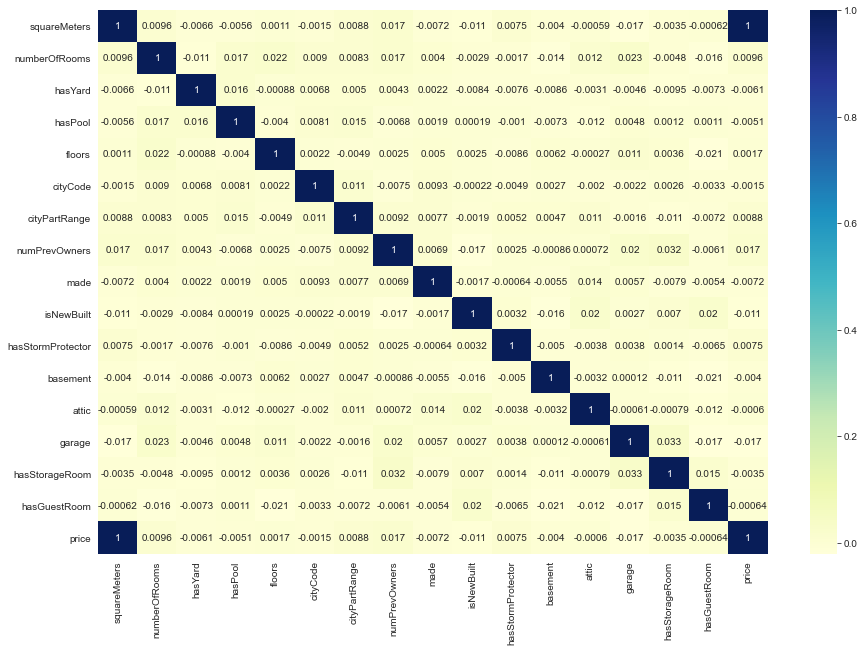

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr() , annot = True,cmap="YlGnBu")

price and square meter depend on each other 

C:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


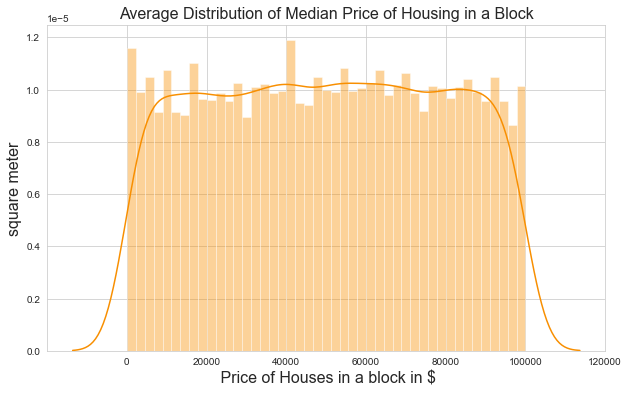

In [25]:
plt.figure(figsize=(10, 6))
sns.distplot(data.squareMeters, bins = 45, color = '#f88f01', hist = True)
plt.xlabel(' Price of Houses in a block in $', fontsize=16)
plt.ylabel('square meter', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.show()

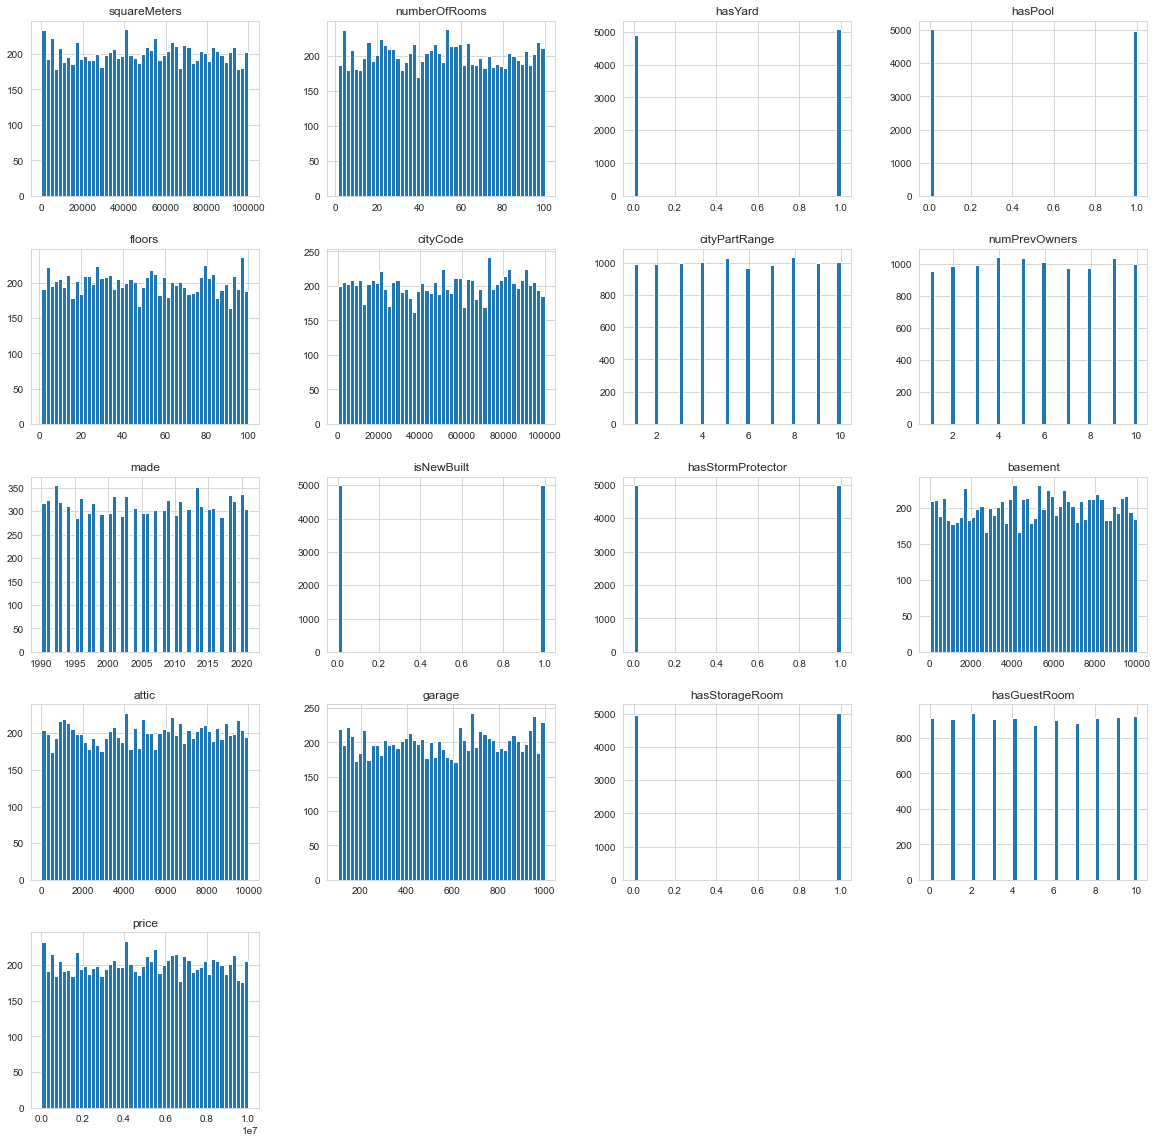

In [26]:
data.hist(bins = 50, figsize = (20,20))
plt.show()

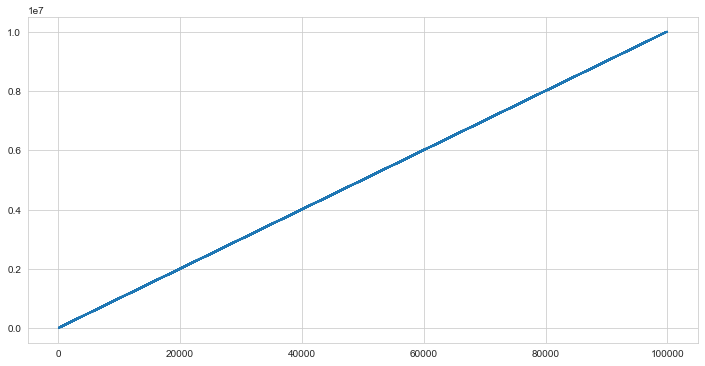

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data['squareMeters'], data['price'])

relation between squaremeters and price is directly 

<AxesSubplot:xlabel='category', ylabel='price'>

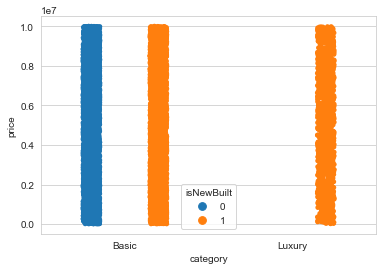

In [28]:
sns.stripplot(x='category', y='price', data=data,
              jitter=True, hue='isNewBuilt', dodge=True)

No old houses in luxury category 

squareMeters            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
numberOfRooms        AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
hasYard               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
hasPool              AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
floors               AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
cityCode                AxesSubplot(0.125,0.677439;0.133621x0.0920732)
cityPartRange        AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
numPrevOwners         AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
made                 AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
isNewBuilt           AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
hasStormProtector       AxesSubplot(0.125,0.566951;0.133621x0.0920732)
basement             AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
attic                 AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
garage               AxesSubplot(0.606034,0.566951;0.133621x0.0920732)
hasSto

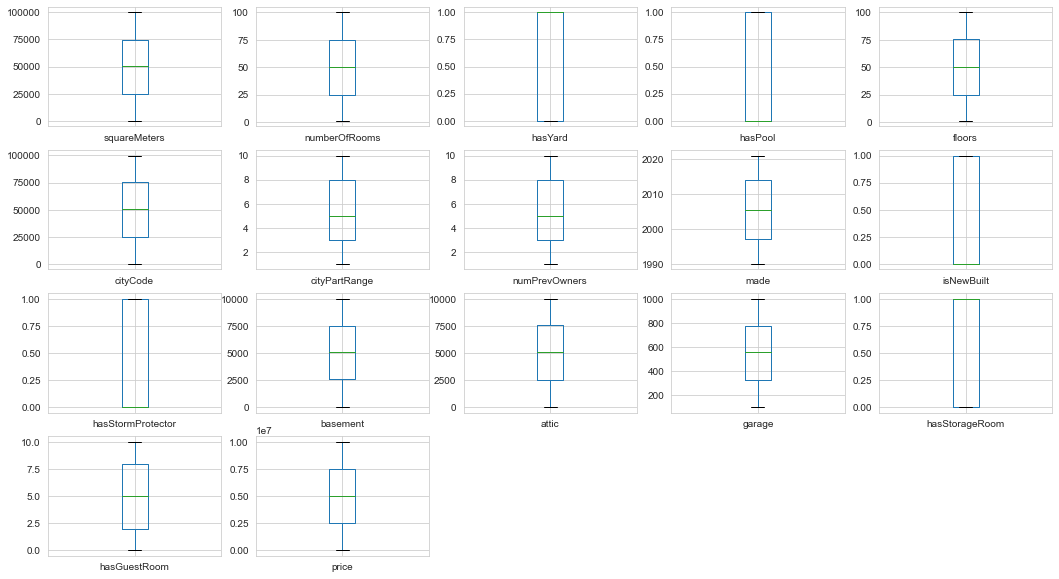

In [29]:
data.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (7,5))


In [134]:
pd.crosstab(data['category'], data['hasStormProtector'],margins=True).style.background_gradient(cmap="YlGnBu")

hasStormProtector,0,1,All
category,,,
0,4372,4363,8735
1,629,636,1265
All,5001,4999,10000


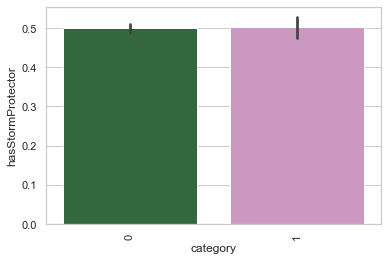

In [84]:
sns.barplot(x=data['category'],y=data['hasStormProtector'],palette='cubehelix')
plt.xticks(rotation='vertical')
plt.show()


In [31]:
data['made'].value_counts().unique

<bound method Series.unique of 1992    356
2013    352
2020    336
2018    334
2003    332
2001    332
1996    327
1991    324
2009    324
2011    321
2019    321
1993    320
1998    318
1990    317
1994    312
2014    312
2016    307
2004    307
2015    305
2012    305
2021    304
2008    302
2007    302
1997    296
2005    296
2006    296
2000    295
1999    293
2010    291
2002    290
2017    288
1995    285
Name: made, dtype: int64>

C:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


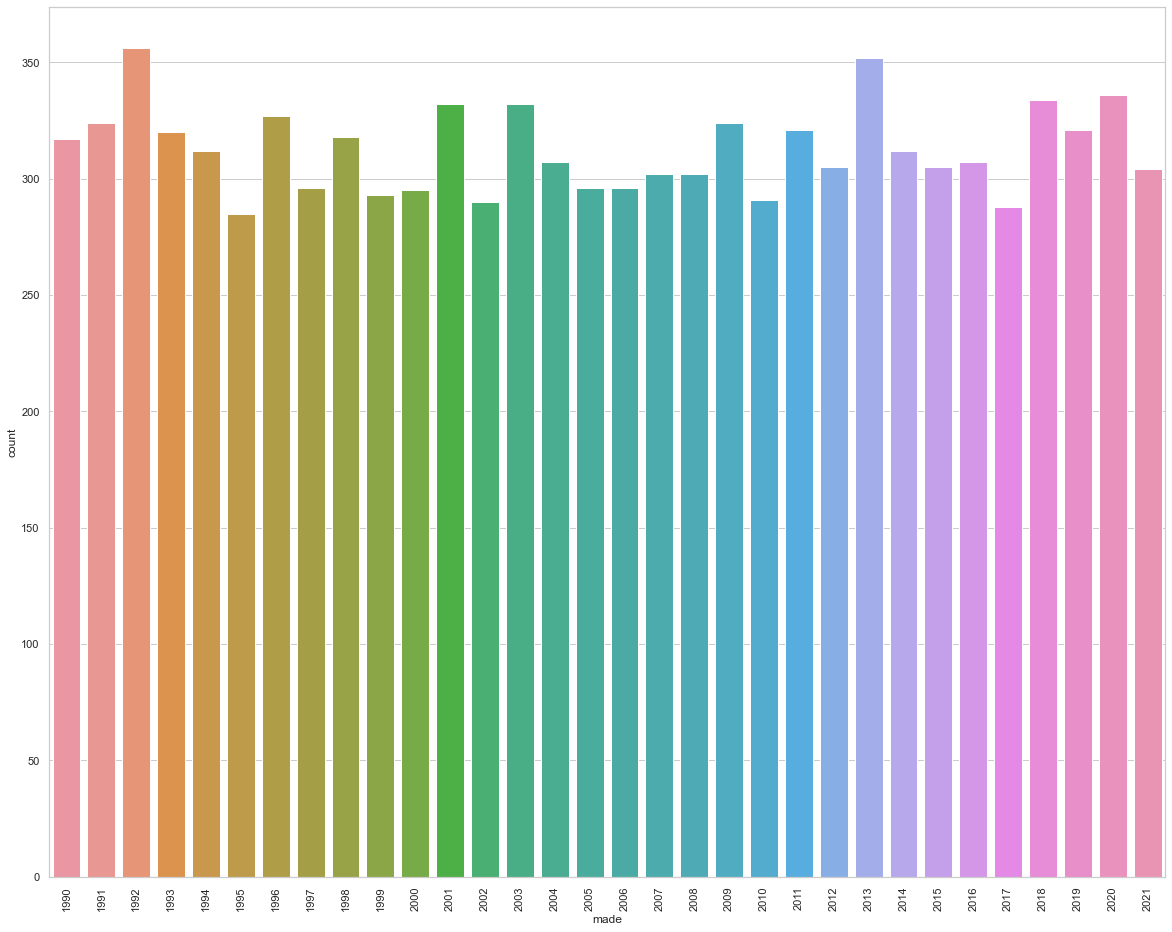

In [32]:
plt.figure(figsize=(20,16))
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 9)
sns.countplot(data['made'])
plt.xticks(rotation=90)
plt.show()

# Preprocessing

In [33]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

No nulls in data

In [34]:
len(data)-len(data.drop_duplicates())

0

No duplication

In [35]:
data.drop("price" , axis = 1, inplace = True)

In [36]:
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,Basic


In [37]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['category'] = label.fit_transform(data['category'])

<AxesSubplot:>

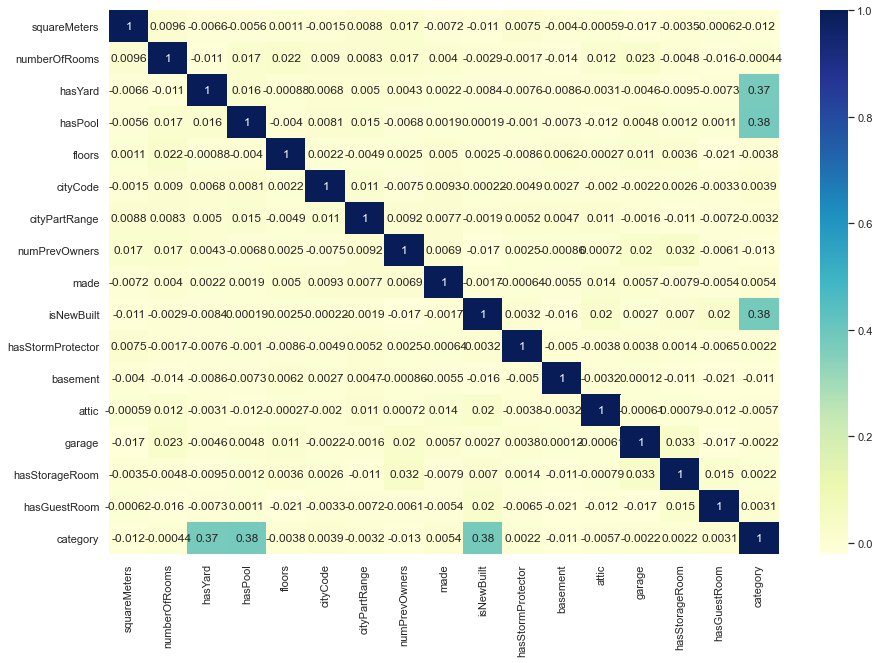

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr() , annot = True, cmap="YlGnBu")

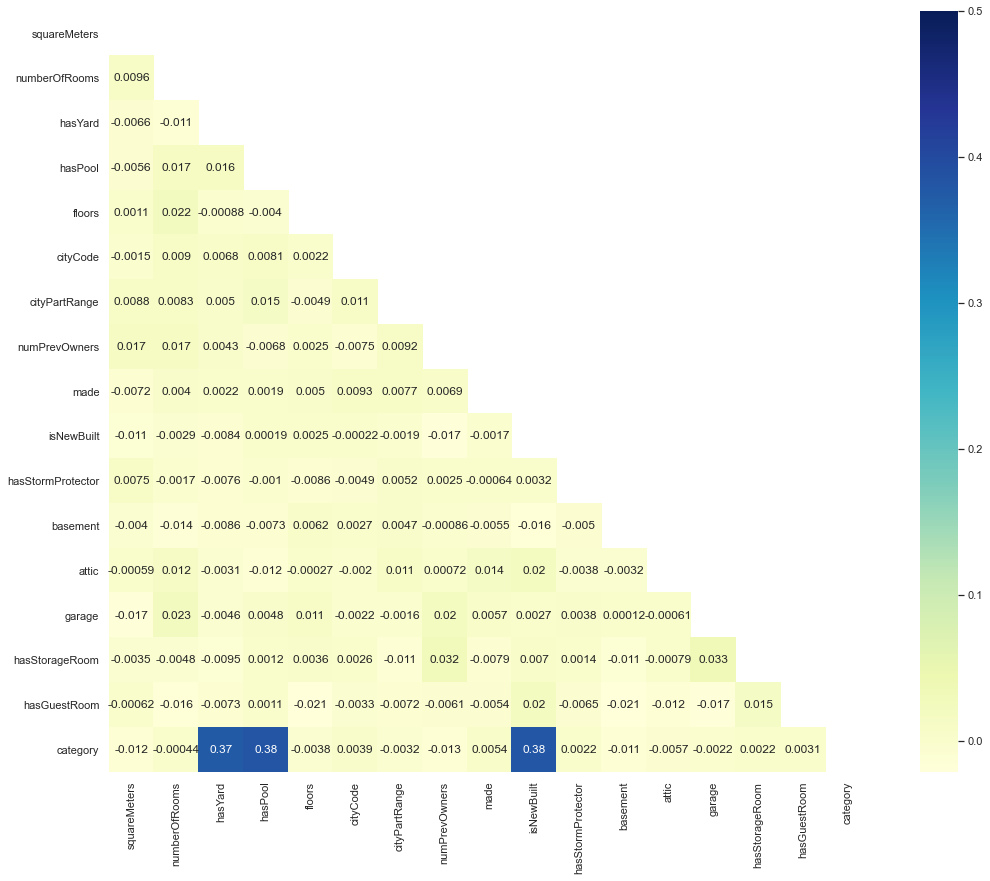

In [39]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 14))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.5, square=True,annot = True, cmap="YlGnBu")

In [40]:
x = data.drop("category" , axis = 1).values
y = data['category'].values

### Split data

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20 , random_state=42)

# Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [43]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Modeling

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

## Decision Tree

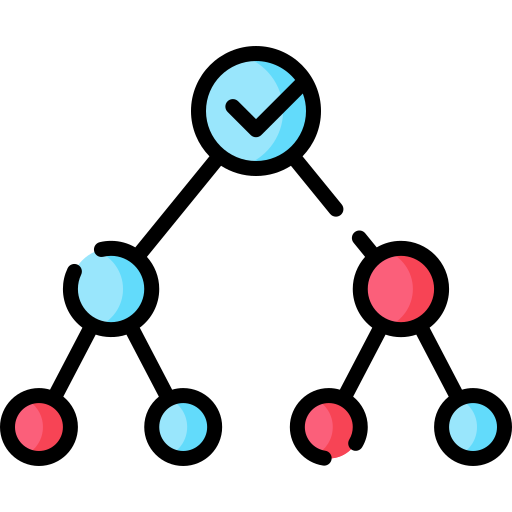

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=11 , random_state=42)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)

print('Accuracy_Score of Decision Tree: ', accuracy_score(y_test, dt_pred))
matrix=confusion_matrix(y_test, dt_pred)

Accuracy_Score of Decision Tree:  1.0


<AxesSubplot:>

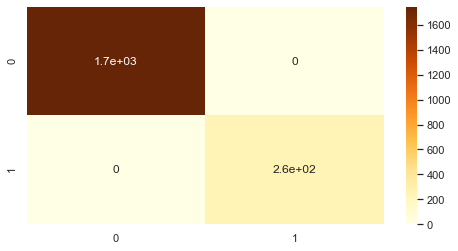

In [97]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix , annot = True, cmap="YlOrBr")

In [47]:
feature_names = ['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom','hasGuestRoom']

In [48]:
class_names = ['Basic','Luxury']

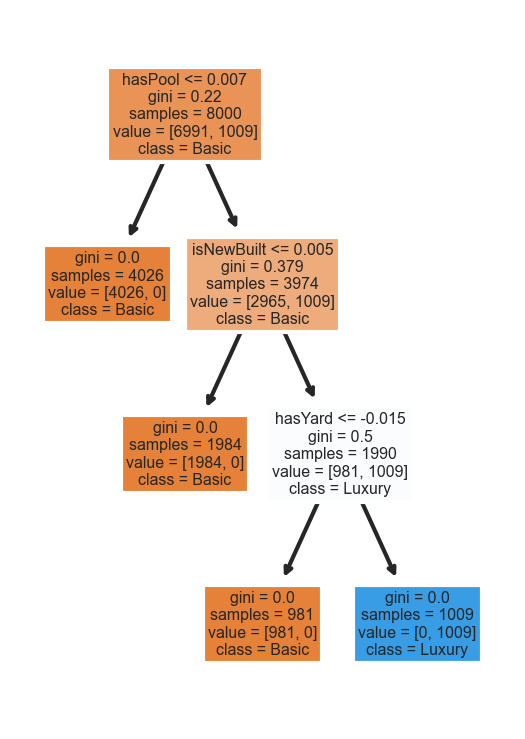

In [49]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=300)
tree.plot_tree(dt,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
fig.savefig('imagename.png')

-----------------------------------------------------

## KNeighborsClassifier

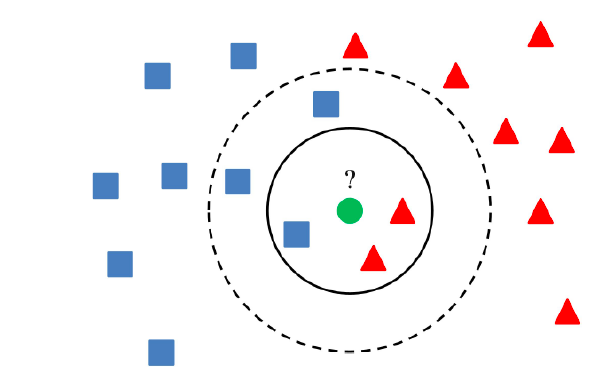

In [93]:
from sklearn.neighbors import KNeighborsClassifier 

In [99]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)

print('Accuracy_Score of KNeighbors Classifier: ', accuracy_score(y_test, knn_pred))
matrix1=confusion_matrix(y_test, knn_pred)

Accuracy_Score of KNeighbors Classifier:  0.9985


<AxesSubplot:>

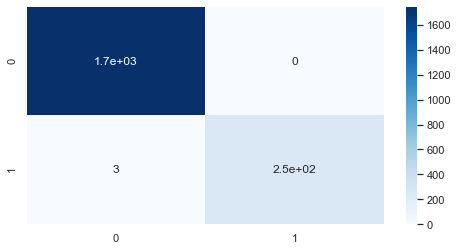

In [103]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix1 , annot = True, cmap="Blues")

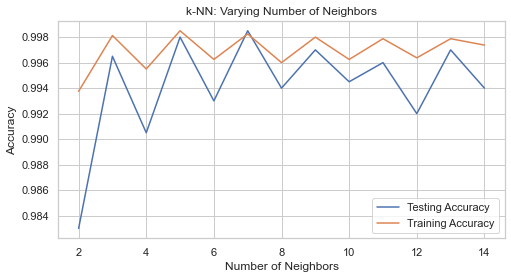

In [54]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(2, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier (n_neighbors = k)
    # Fit the classifier to the training data
    knn.fit(X_train_scaled,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)
# Generate plot
plt.figure(figsize=(8,4))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

-----------------------------------------------------------

## Logistic Regression

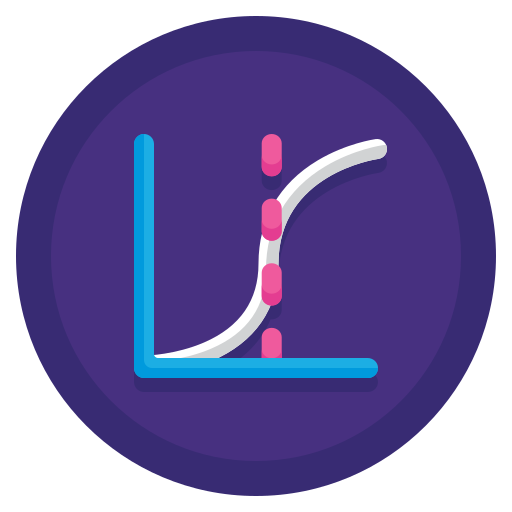

In [55]:
from sklearn.linear_model import LogisticRegression

In [101]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)

print('Accuracy Score of Logistic Regression: ', accuracy_score(y_test, logreg_pred))
matrix2=confusion_matrix(y_test, logreg_pred)

Accuracy Score of Logistic Regression:  1.0


<AxesSubplot:>

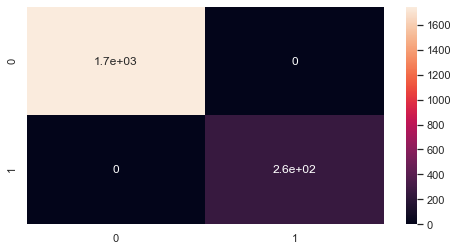

In [114]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix2 , annot = True, cmap="rocket")

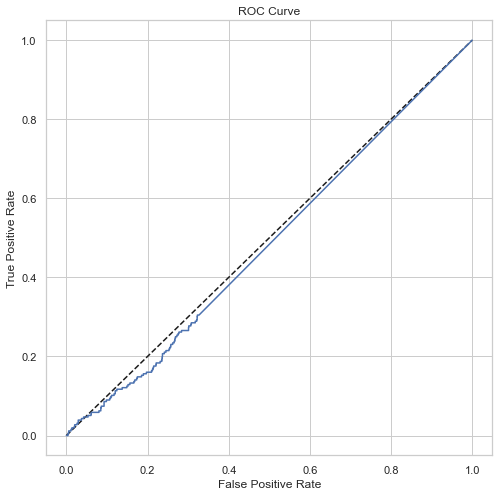

In [57]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

---------------------------------------------------------------------

## SVM

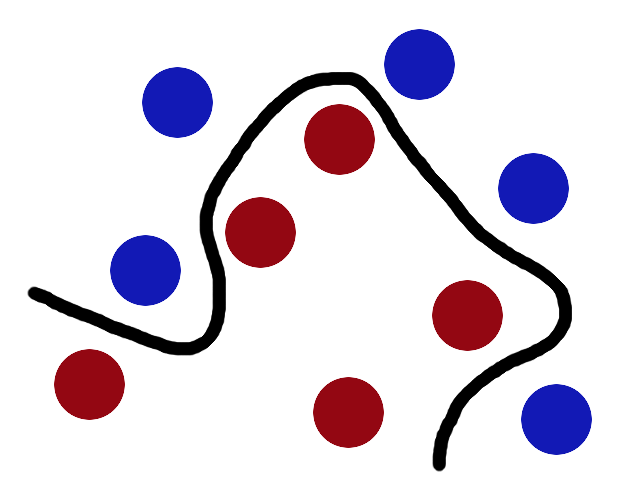

In [115]:
from sklearn.svm import SVC

In [116]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print('Accuracy Score of Super Vector Machine: ', accuracy_score(y_test, svm_pred))
matrix3=confusion_matrix(y_test, svm_pred)

Accuracy Score of Super Vector Machine:  1.0


<AxesSubplot:>

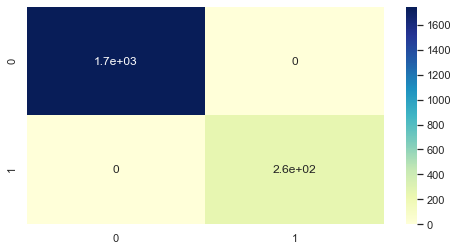

In [130]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix3 , annot = True, cmap="YlGnBu")

## Random Forest Classifier

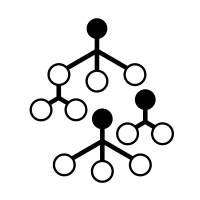

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
RF_pred = RF.predict(X_test_scaled)

print('Accuracy Score of Random Forest Classifier: ', accuracy_score(y_test, RF_pred))
matrix4=confusion_matrix(y_test, RF_pred)

Accuracy Score of Random Forest Classifier:  1.0


<AxesSubplot:>

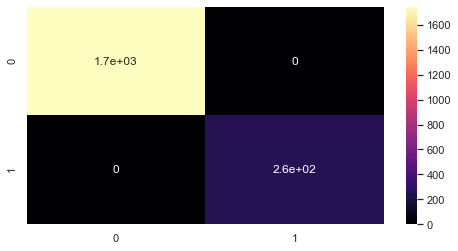

In [127]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix4 , annot = True, cmap="magma")

In [62]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## xgboost Classifier

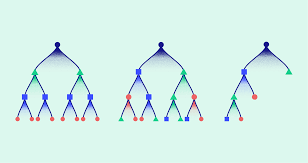

In [77]:
from xgboost import XGBClassifier

In [129]:
XG = XGBClassifier()
XG.fit(X_train_scaled, y_train)
xg_pred = XG.predict(X_test_scaled)

print('Accuracy Score of XGBClassifier: ', accuracy_score(y_test, xg_pred))
matrix5=confusion_matrix(y_test, xg_pred)

C:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XGBClassifier:  1.0


<AxesSubplot:>

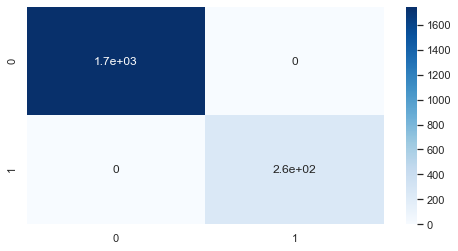

In [133]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix5 , annot = True, cmap="Blues")

<Figure size 1440x1440 with 0 Axes>

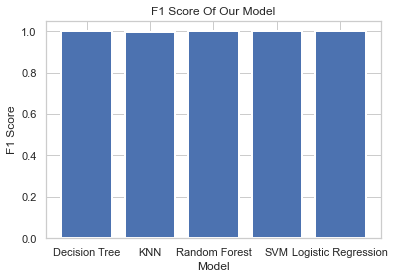

In [83]:
dt_f1 = f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, knn_pred)
svm_f1 = f1_score(y_test, svm_pred)
RF_f1 = f1_score(y_test, RF_pred)
logreg_f1 = f1_score(y_test, logreg_pred)


x=['Decision Tree','KNN','Random Forest','SVM','Logistic Regression']
y=[dt_f1,knn_f1,RF_f1,svm_f1,logreg_f1]

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(x, y, linewidth=2)
plt.title('F1 Score Of Our Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()


### Top features

In [75]:
features_relevancy = pd.DataFrame({'feature': data.drop("category" , axis = 1).columns,'coef': np.abs(logreg.coef_[0])})

print("Top features")

features_relevancy.sort_values(by='coef', ascending=False).head(3).style.background_gradient(cmap="YlGnBu")

Top features


,feature,coef
9,isNewBuilt,5.385772
3,hasPool,5.363631
2,hasYard,5.360474


### Down features

In [76]:
features_relevancy.sort_values(by='coef').head(3).style.background_gradient(cmap="YlGnBu")

,feature,coef
1,numberOfRooms,0.000064
13,garage,0.002453
15,hasGuestRoom,0.002784
